In [29]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles


In [30]:
x,y = make_circles(n_samples=500, factor=0.5, noise=0.05, )

In [27]:
res=100

In [31]:
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

In [32]:
_px=np.array(np.meshgrid(_x0, _x1)).T.reshape(-1,2)

In [33]:
_py=np.zeros((res,res))+0.5

In [ ]:
plt.figure(figsize=(8,8))
plt.pcolormesh(_x0, _x1,_py,cmap="coolwarm", vmin=0,vmax=1 )

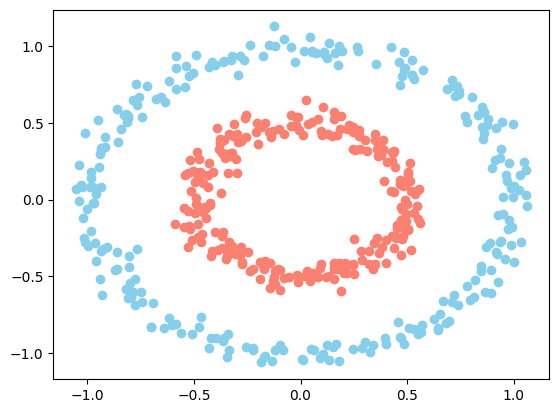

In [35]:
plt.scatter(x[y==0,0],x[y==0,1],c="skyblue")
plt.scatter(x[y==1,0],x[y==1,1],c="salmon")

In [ ]:
plt.tick_params( labelbottom=False, labelleft=False)

#herramineta tensorflow

In [94]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [95]:
from matplotlib import animation
from IPython.core.display import display, HTML

In [96]:

ix =tf.placeholder("float",shape=[None , x.shape[1]])
iy =tf.placeholder("float",shape=[None ])

In [97]:
lr=0.01 # learning rate
nn=[2,16,8,1] # numero de neuronas por capa

In [98]:
# capa
w1=tf.Variable(tf.random_normal([nn[0],nn[1]]), name = "weights_1")
b1=tf.Variable(tf.random_normal([nn[1]]) , name = "bias_1")
l1=tf.nn.relu(tf.add(tf.matmul(ix,w1),b1))

In [99]:
#capa 2
w2=tf.Variable(tf.random_normal([nn[1],nn[2]]), name = "weights_2")
b2=tf.Variable(tf.random_normal([nn[2]]) , name = "bias_2")
l2=tf.nn.relu(tf.add(tf.matmul(l1,w2),b2))

In [100]:
# capa 3
w3=tf.Variable(tf.random_normal([nn[2],nn[3]]), name = "weights_3")
b3=tf.Variable(tf.random_normal([nn[3]]) , name = "bias_3")


In [101]:
#vector de predicion de y
py=tf.nn.sigmoid(tf.add(tf.matmul(l2,w3),b3))[:,0]

In [102]:
#evaluacion de las predicciones
loss=tf.losses.mean_squared_error(py,iy)

In [106]:
#optimizador
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)
n_steps= 1000 # numero de iteraciones o epocas
ipy=[]

In [111]:
with tf.Session() as sess:
  #inicializamos todos los parametros de la red ,las matrices W y b
  sess.run(tf.global_variables_initializer())
  # iteramos n pases de entrenamiento.
  for step in range(n_steps):
    #evaluamos al optimizador
    #la evaluacion del optimizador
    _, _loss,_py=sess.run([optimizer,loss,py],feed_dict={ix:x,iy:y})
    if step%25==0:
      acc=np.mean(np.round(_py) == y)
      print("step", step, "/", n_steps, "loss=", _loss, "Acc=", acc)
      _py = sess.run(py, feed_dict={ix: _px}).reshape((res, res))
      ipy.append(_py)

step 0 / 1000 loss= 0.33460087 Acc= 0.606
step 25 / 1000 loss= 0.24513602 Acc= 0.586
step 50 / 1000 loss= 0.19085327 Acc= 0.71
step 75 / 1000 loss= 0.1591512 Acc= 0.82
step 100 / 1000 loss= 0.12776259 Acc= 0.898
step 125 / 1000 loss= 0.09847436 Acc= 0.93
step 150 / 1000 loss= 0.07882877 Acc= 0.942
step 175 / 1000 loss= 0.06517784 Acc= 0.968
step 200 / 1000 loss= 0.05493851 Acc= 0.974
step 225 / 1000 loss= 0.04695085 Acc= 0.988
step 250 / 1000 loss= 0.040781286 Acc= 0.996
step 275 / 1000 loss= 0.0358424 Acc= 0.998
step 300 / 1000 loss= 0.031803336 Acc= 0.998
step 325 / 1000 loss= 0.028444532 Acc= 0.998
step 350 / 1000 loss= 0.025634661 Acc= 0.998
step 375 / 1000 loss= 0.023221318 Acc= 0.998
step 400 / 1000 loss= 0.021123614 Acc= 0.998
step 425 / 1000 loss= 0.019299427 Acc= 0.998
step 450 / 1000 loss= 0.01772836 Acc= 1.0
step 475 / 1000 loss= 0.016345378 Acc= 1.0
step 500 / 1000 loss= 0.015147646 Acc= 1.0
step 525 / 1000 loss= 0.014106927 Acc= 1.0
step 550 / 1000 loss= 0.013182914 Acc= 1

In [116]:
# codigo de animacion

ims = []
fig = plt.figure(figsize=(10, 10))
print("---generador de animación---")

---generador de animación---


<Figure size 1000x1000 with 0 Axes>

In [ ]:
for fr in range(len(ipy)):
  im = plt.pcolormesh(_x0,_x1, ipy[fr], cmap="coolwarm", animated=True)
  plt.scatter(x[y==0,0],x[y==0,1],c="skyblue")
  plt.scatter(x[y==1,0],x[y==1,1],c="salmon")
  plt.tick_params(labelbottom=False, labelleft=False)
  ims.append([im])
  ani=animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
  HTML(ani.to_html5_video())

neuronas creadas en la libreria sklearn

In [ ]:
import sklearn as sk
import sklearn.neural_network

from IPython.core.display import display, HTML


In [ ]:
Lr =0.01
nn=[2,16,8,1]

In [ ]:
clf = sk.neural_network.MLPRegressor(solver="sgd", learning_rate_init=Lr,
                                     hidden_layer_sizes=tuple(nn[1:]),
                                     verbose=True, n_iter_no_change=1000,
                                     batch_size=64)

In [ ]:
clf.fit(x,y)

Iteration 1, loss = 0.12650179
Iteration 2, loss = 0.12593067
Iteration 3, loss = 0.12521638
Iteration 4, loss = 0.12518674
Iteration 5, loss = 0.12507537
Iteration 6, loss = 0.12512386
Iteration 7, loss = 0.12502261
Iteration 8, loss = 0.12503690
Iteration 9, loss = 0.12504585
Iteration 10, loss = 0.12503834
Iteration 11, loss = 0.12507330
Iteration 12, loss = 0.12505346
Iteration 13, loss = 0.12514238
Iteration 14, loss = 0.12505871
Iteration 15, loss = 0.12505524
Iteration 16, loss = 0.12503436
Iteration 17, loss = 0.12503084
Iteration 18, loss = 0.12502982
Iteration 19, loss = 0.12505612
Iteration 20, loss = 0.12520792
Iteration 21, loss = 0.12504913
Iteration 22, loss = 0.12504931
Iteration 23, loss = 0.12504398
Iteration 24, loss = 0.12506493
Iteration 25, loss = 0.12509764
Iteration 26, loss = 0.12508447
Iteration 27, loss = 0.12515317
Iteration 28, loss = 0.12507522
Iteration 29, loss = 0.12505867
Iteration 30, loss = 0.12510219
Iteration 31, loss = 0.12502574
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=64, hidden_layer_sizes=(16, 8, 1),
             learning_rate_init=0.01, n_iter_no_change=1000, solver='sgd',
             verbose=True)



```
#biblioteca keras neurona
```



In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

from IPython.core.display import display, HTML




In [ ]:
x = np.random.rand(100, 10)
y = np.random.rand(100, 5)

In [ ]:
lr =0.01 #learning rate
nn=[2,16,8,1]# capas de neuronas

In [ ]:
#objeto que contendra a nuestra red neuronal,como secuencia de capas
model=keras.Sequential()# empezamos en cero o vacio

# primera capa
l1=model.add(keras.layers.Dense(nn[1],activation="relu"))

In [ ]:
# segunda capa
l2=model.add(keras.layers.Dense(nn[2],activation="relu"))

In [ ]:
#tercera capa
l3=model.add(keras.layers.Dense(nn[3],activation="sigmoid"))

In [ ]:
# compilamos, optimizador, funcion de coste.
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.01), metrics=["acc"])

In [ ]:
#entrenamos
model.fit(x,y,epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0832 - acc: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0832 - acc: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0832 - acc: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0831 - acc: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0831 - acc: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0831 - acc: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0831 - acc: 0.0000e+00
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0831 - acc: 0.0000e+00
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0831 - acc: 0.0000e+00
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0831 - acc: 0.0000e+00
Epoch 11/100
4/4 [=====================